<a href="https://colab.research.google.com/github/BakJungHo/PaCO/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B8%B0%EC%B4%88(9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.시퀀스 배열로 다루는 순환 신경망(RNN)
==
1) LSTM을 이용한 로이터 뉴스 카테고리 분류하기
--

In [12]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)  #num_words는 빈도가 1~1000에 해당하는 단어만 선택해서 불러오는 것

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [16]:
# 각 기사의 단어 수가 제각각 다르므로 단어의 숫자를 맞춰야 한다.
# 데이터 전처리 함수인 sesquence를 이용한다.

from keras.preprocessing import sequence 

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen = 100)   #maxlen = 100은 단어 수를 100개로 맞추라는 뜻
x_test = sequence.pad_sequences(X_test, maxlen = 100)

y_train = np_utils.to_categorical(Y_train)   # y데이터에 원핫 인코딩 처리를 하여 데이터 전처리 과정을 마침
y_test = np_utils.to_categorical(Y_test)

In [17]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation = 'tanh'))
model.add(Dense(46, activation = 'softmax'))

* Embedding 층은 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환하는 역할을 함
  * Embedding('불러온 단어의 총 개수', '기사당 단어 수') 형식으로 사용하며, 모델 설정 부분의 맨 처음에 있어야 함
* LSTM은 RNN에서 기억 값에 대한 가중치를 제어함
  * LSTM(기사당 단어수, 기타 옵션)의 형태로 적용됨
  * LSTM의 활성화 함수로는 Tanh를 사용

In [18]:
# 모델의 컴파일
model.compile(loss = 'categorical_crossentropy', 
              optimizer= 'adam', 
              metrics = ['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs = 20, validation_data = (x_test, y_test))

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 3s 15ms/step - loss: 2.5635 - accuracy: 0.3656 - val_loss: 2.1692 - val_accuracy: 0.4884
Epoch 2/20
90/90 [==============================] - 1s 11ms/step - loss: 2.0427 - accuracy: 0.4948 - val_loss: 1.9861 - val_accuracy: 0.5151
Epoch 3/20
90/90 [==============================] - 1s 10ms/step - loss: 1.9685 - accuracy: 0.5137 - val_loss: 1.9034 - val_accuracy: 0.5267
Epoch 4/20
90/90 [==============================] - 1s 10ms/step - loss: 1.7905 - accuracy: 0.5500 - val_loss: 1.7254 - val_accuracy: 0.5717
Epoch 5/20
90/90 [==============================] - 1s 11ms/step - loss: 1.6505 - accuracy: 0.5762 - val_loss: 1.6731 - val_accuracy: 0.5815
Epoch 6/20
90/90 [==============================] - 1s 10ms/step - loss: 1.5866 - accuracy: 0.6018 - val_loss: 1.6172 - val_accuracy: 0.5935
Epoch 7/20
90/90 [==============================] - 1s 10ms/step - loss: 1.5329 - accuracy: 0.6259 - val_loss: 1.5565 - val_accuracy: 0.6184
Epoch 8/20
90

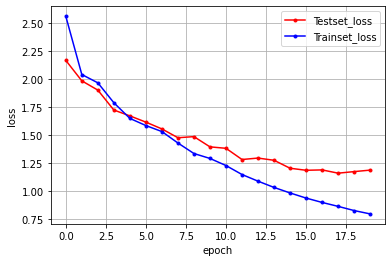

In [19]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()